In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [10]:
conn = sqlite3.connect('../suicides.db')

In [5]:
c = conn.cursor()

In [11]:
c.execute("""SELECT * FROM suicides""")

In [12]:
sql_str = """SELECT * FROM suicides"""

In [13]:
suicides_df = pd.read_sql_query(sql_str, conn)

In [14]:
suicides_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,,"2,156,624,900",796,Boomers


In [30]:
sql_str_alb = """
SELECT * FROM suicides
WHERE country = 'Albania'
AND age = '75+ years'"""

suicides_alb_df = pd.read_sql_query(sql_str_alb, conn)
suicides_alb_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,,"2,156,624,900",796,G.I. Generation
1,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,,"2,156,624,900",796,G.I. Generation
2,Albania,1988,female,75+ years,2,36400,5.49,Albania1988,,"2,126,000,000",769,G.I. Generation
3,Albania,1988,male,75+ years,1,22300,4.48,Albania1988,,"2,126,000,000",769,G.I. Generation
4,Albania,1989,male,75+ years,2,22500,8.89,Albania1989,,"2,335,124,988",833,G.I. Generation


In [29]:
sql_str_usa = """
SELECT * FROM suicides
WHERE country = 'United States'
AND age = '75+ years'"""

suicides_usa_df = pd.read_sql_query(sql_str_usa, conn)
suicides_usa_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
1,United States,1985,female,75+ years,466,7469000,6.24,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
2,United States,1986,male,75+ years,2340,4178000,56.01,United States1986,,"4,590,155,000,000",20588,G.I. Generation
3,United States,1986,female,75+ years,521,7669000,6.79,United States1986,,"4,590,155,000,000",20588,G.I. Generation
4,United States,1987,male,75+ years,2532,4295000,58.95,United States1987,,"4,870,217,000,000",21631,G.I. Generation


In [71]:
sql_str_usa = """
SELECT year,  SUM(suicides_no) as num_suicides, SUM(population) as population, SUM(suicides_no)*100000.0/SUM(population) as 'suicides/100kpop' FROM suicides
WHERE country = 'United States'
AND age = '75+ years'
GROUP BY year"""

suicides_usa_df = pd.read_sql_query(sql_str_usa, conn)
suicides_usa_df.head()

,year,num_suicides,population,suicides/100kpop
0,1985,2643,11533000,22.916847
1,1986,2861,11847000,24.149574
2,1987,3036,12167000,24.952741
3,1988,3067,12471000,24.593056
4,1989,2953,12803000,23.064907


In [72]:
sql_str_alb = """
SELECT year,  SUM(suicides_no) as num_suicides, SUM(population) as population, SUM(suicides_no)*100000.0/SUM(population) as 'suicides/100kpop' FROM suicides
WHERE country = 'Albania'
AND age = '75+ years'
GROUP BY year"""

suicides_alb_df = pd.read_sql_query(sql_str_alb, conn)
suicides_alb_df.head()

,year,num_suicides,population,suicides/100kpop
0,1987,2,57400,3.484321
1,1988,3,58700,5.110733
2,1989,2,59500,3.361345
3,1992,0,62600,0.000000
4,1993,1,63500,1.574803


In [50]:
from scipy.stats import ttest_ind

In [69]:
ttest_ind(suicides_alb_df['suicides/100kpop'], suicides_usa_df['suicides/100kpop'], equal_var=False)


Ttest_indResult(statistic=-23.3423345748186, pvalue=3.3568971124371426e-20)

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

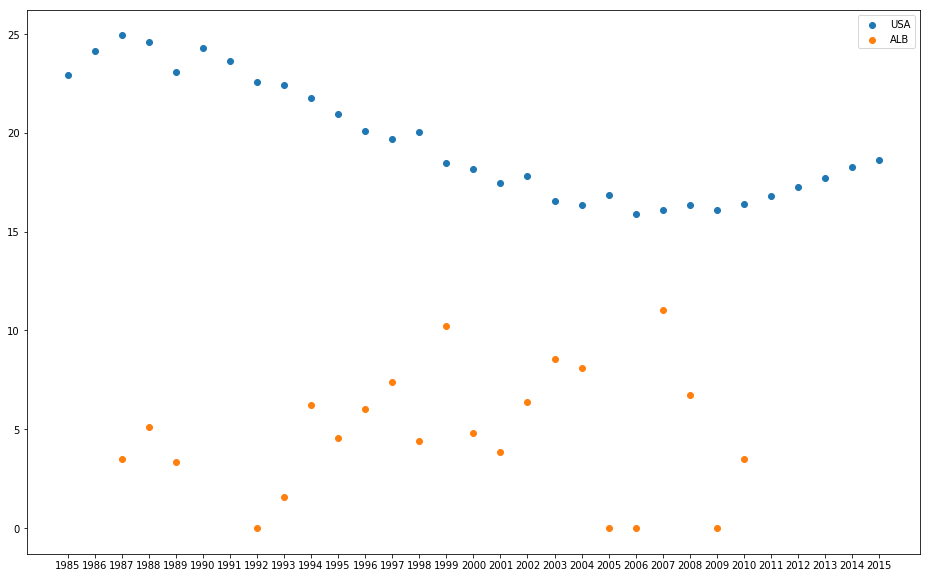

In [74]:
fig = plt.figure(figsize=(16,10))
plt.scatter(suicides_usa_df['year'], suicides_usa_df['suicides/100kpop'], label = 'USA')
plt.scatter(suicides_alb_df['year'], suicides_alb_df['suicides/100kpop'], label = 'ALB')
plt.legend()

In [85]:
sql_test = """
SELECT *, row_number () FROM suicides
--ORDER BY row_number()
LIMIT 100"""

suicides_alb_df = pd.read_sql_query(sql_test, conn)
suicides_alb_df.head()

DatabaseError: Execution failed on sql '
SELECT *, row_number () FROM suicides
--ORDER BY row_number()
LIMIT 100': no such function: row_number

(('country', None, None, None, None, None, None),
 ('year', None, None, None, None, None, None),
 ('sex', None, None, None, None, None, None),
 ('age', None, None, None, None, None, None),
 ('suicides_no', None, None, None, None, None, None),
 ('population', None, None, None, None, None, None),
 ('suicides/100k pop', None, None, None, None, None, None),
 ('country-year', None, None, None, None, None, None),
 ('HDI for year', None, None, None, None, None, None),
 (' gdp_for_year ($) ', None, None, None, None, None, None),
 ('gdp_per_capita ($)', None, None, None, None, None, None),
 ('generation', None, None, None, None, None, None))